In [1]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
df_W=pd.read_csv(open('201501-citibike-tripdata.csv'))
df_S=pd.read_csv(open('201506-citibike-tripdata.csv'))

In [4]:
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

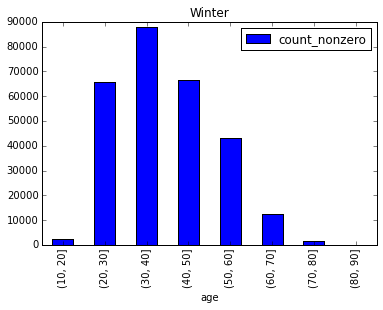

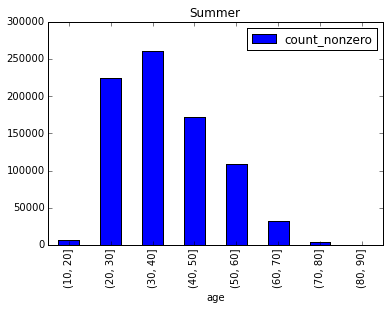

In [5]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

## KS test compare to normal

In [6]:
ksW=scipy.stats.kstest(W_age_dist, 'norm')
ksS=scipy.stats.kstest(S_age_dist, 'norm')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)


## AD-test compare to normal

In [7]:
adW=scipy.stats.anderson(df_W['age'].dropna(), dist='norm')
adS=scipy.stats.anderson(df_S['age'].dropna(), dist='norm')
print "winter, normal fit", adW
print "summer, normal fit", adS

winter, normal fit AndersonResult(statistic=2732.9753468575072, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=11329.465162479202, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


## KS test compare to Cauchy

In [11]:
ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=0.99999637418970078, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.9999987788873137, pvalue=0.0)


## AD-test compare to exponential

In [14]:
adW=scipy.stats.anderson(df_W['age'].dropna(), dist='expon')
adS=scipy.stats.anderson(df_S['age'].dropna(), dist='expon')
print "winter, normal fit", adW
print "summer, normal fit", adS

winter, normal fit AndersonResult(statistic=66066.210136580979, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=189837.79916741711, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
